Installation des modules

In [ ]:
!pip install findiff
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from findiff import FinDiff
import matplotlib.pyplot as plt

Ensuite, définition du potentiel

In [ ]:
# Grille
x = np.linspace(-20, 20, 1001)
dx = x[1] - x[0]

# dérivée d'ordre second
d2_dx2 = FinDiff(0, dx, 2)

# Caractéristiques du potentiel
L = 1 #pour gamma, L = 1, pour sin L = 10
V_0 = 0.1
gamma = 0.1

# Fonction mathématique de la perturbation
perturbation = V_0*np.sin(np.pi*x/L)
#perturbation = gamma*x*(L-x)


# On génère le potentiel non pertub
V_inf = np.zeros(x.shape)
V_inf[x < 0] = 100000000000 
V_inf[x > L] = 100000000000  

# potentil perturb
V_inf_perturb = np.zeros(x.shape)  
V_inf_perturb[x < 0] = 100000000000  
V_inf_perturb[x > L] = 100000000000  


# Matrice du potentiel
V = diags(V_inf)
V_pert = diags(V_inf - perturbation)

# Opérateur pour l'éq. de schrodinger avec la dérivée seconde
K = -0.5 * d2_dx2.matrix(x.shape)

# Calcule d'énergies propres et états propres
energies, states = eigs(K + V, k=3, which='SR')
energies_perturb, states_perturb = eigs(K + V_pert, k=3, which='SR')


# différences d'énergie :
diff_energies = energies - energies_perturb
print("Corrections pour l'état fondamental, premier état excité et deuxième : ", np.real(diff_energies))

Corrections pour l'état fondamental, premier état excité et deuxième :  [0.08542244 0.06801092 0.06478767]


Ensuite on affiche :

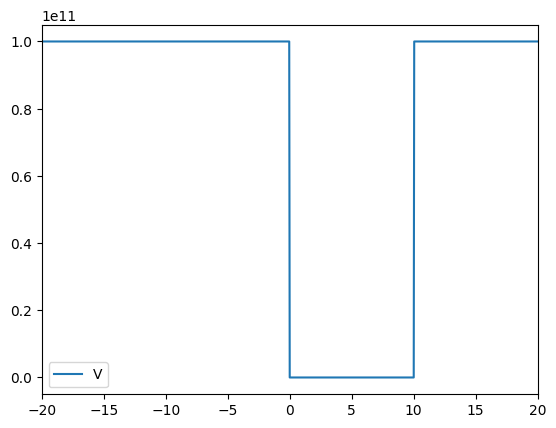

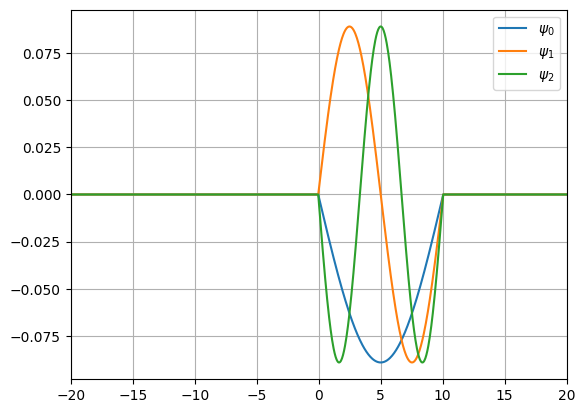

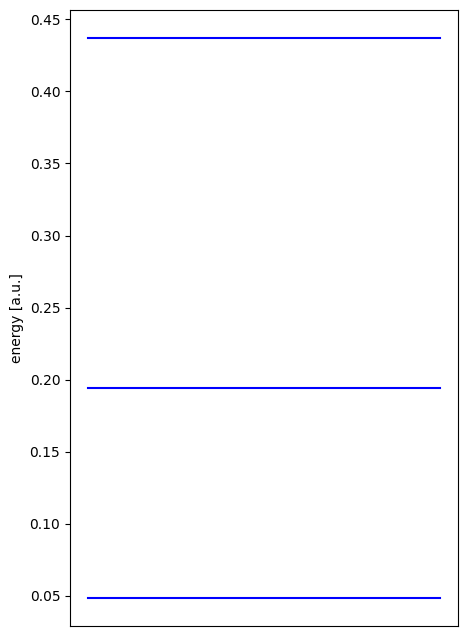

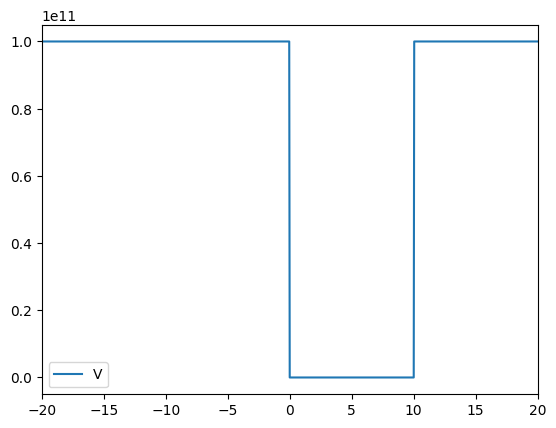

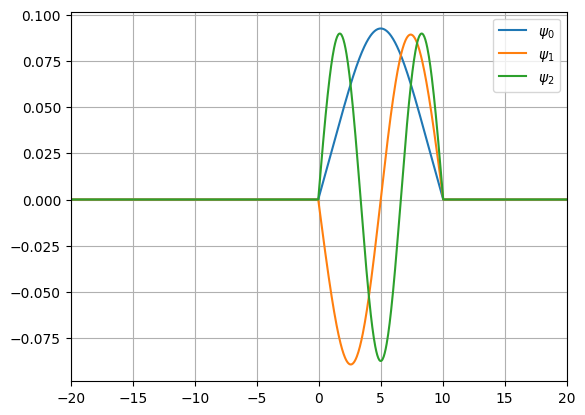

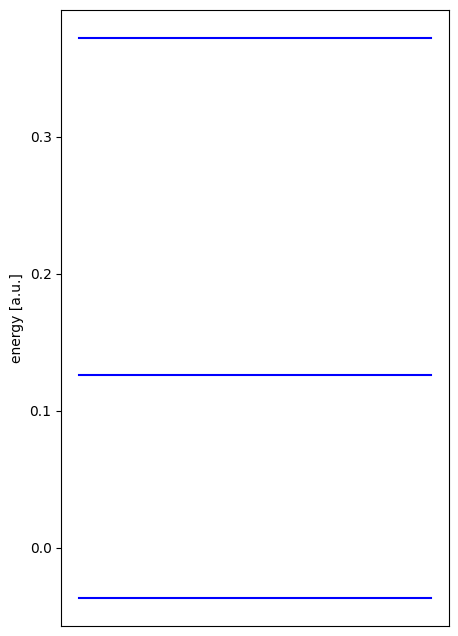

In [ ]:
# Non perturbé
plt.plot(x, V.diagonal(), label=r'V')
plt.legend()
plt.xlim(min(x), max(x))
plt.show()

plt.plot(x, states[:, 0].real, label=r'$\psi_0$')
plt.plot(x, states[:, 1].real, label=r'$\psi_1$')
plt.plot(x, states[:, 2].real, label=r'$\psi_2$')
plt.grid()
plt.legend()
plt.xlim(min(x), max(x))
plt.show()


fig = plt.figure(figsize=(5,8))
ax = fig.gca()
levels = [[(0, 1), (e.real, e.real)] for e in energies]
for level in levels[:5]:
    ax.plot(level[0], level[1], '-b')
ax.set_xticks([])
ax.set_ylabel('energy [a.u.]')
plt.show()

plt.plot(x, V.diagonal(), label=r'V')
plt.legend()
plt.xlim(min(x), max(x))
plt.show()


# Perturbé
plt.plot(x, states_perturb[:, 0].real, label=r'$\psi_0$')
plt.plot(x, states_perturb[:, 1].real, label=r'$\psi_1$')
plt.plot(x, states_perturb[:, 2].real, label=r'$\psi_2$')
plt.grid()
plt.legend()
plt.xlim(min(x), max(x))
plt.show()


fig = plt.figure(figsize=(5,8))
ax = fig.gca()
levels = [[(0, 1), (e.real, e.real)] for e in energies_perturb]
for level in levels[:5]:
    ax.plot(level[0], level[1], '-b')
ax.set_xticks([])
ax.set_ylabel('energy [a.u.]')
plt.show()